# 1- Import du dataset

* Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re

* *Configuration temporaire pour afficher toutes les colonnes*

In [2]:
pd.set_option('display.max_columns', None)

*   Import des fichiers

In [3]:
# !!! Ne pas oublier de mettre le projet github en public

games = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympics_Games.csv')
country = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympics_Country.csv')
results = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Results.csv')
athlete = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Athlete_Bio.csv')
ath_event_res = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Athlete_Event_Results.csv')
medal = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Games_Medal_Tally.csv')

*   Concaténation des fichiers

In [4]:
df = games.merge(country, on='country_noc', how='left')
df = df.merge(ath_event_res, on='edition_id',how='left') 
df = df.merge(athlete,on='athlete_id',how='left')

# 2-    EDA (Exploratory Data Analysis)

>>## 1 - Connaissance du dataset

In [5]:
# Affichage des 5 premières lignes
df.head()

,edition_x,edition_id,edition_url,year,city,country_flag_url,country_noc_x,start_date,end_date,competition_date,isHeld,country_x,edition_y,country_noc_y,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country_y,country_noc,description,special_notes
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Artistic Gymnastics,"Horse Vault, Men",70002.0,Charles Champaud,31002.0,AC,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
1,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Artistic Gymnastics,"Parallel Bars, Men",70006.0,Charles Champaud,31002.0,AC,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
2,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Artistic Gymnastics,"Pommelled Horse, Men",70003.0,Charles Champaud,31002.0,AC,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
3,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Athletics,"Pole Vault, Men",56024.0,Charles Champaud,31002.0,DNS,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
4,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,AUT,Cycling Road,"Road Race, Individual, Men",153005.0,Adolf Schmal,16491.0,DNS,na,False,Adolf Schmal,Male,1872-09-18,na,na,Austria,AUT,Adolf Schmal won a single Olympic title in Ath...,na


In [6]:
# Affichage du nombre de lignes et de colonnes
num_rows,num_columns = df.shape
print("le nombre de lignes est de : ",num_rows)
print("le nombre de colonnes est de : ",num_columns)

le nombre de lignes est de :  314916
le nombre de colonnes est de :  31


In [7]:
# Calcul du nombre de valeurs manquantes ('NaN')
print("Le nombre de valeurs manquantes poar colonnes")
df.isna().sum()

Le nombre de valeurs manquantes poar colonnes


edition_x                0
edition_id               0
edition_url              0
year                     0
city                     0
country_flag_url         0
country_noc_x            0
start_date            3155
end_date             10254
competition_date         0
isHeld              314911
country_x                0
edition_y                9
country_noc_y            9
sport                    9
event                    9
result_id                9
athlete                  9
athlete_id               9
pos                      9
medal                    9
isTeamSport              9
name                     9
sex                      9
born                     9
height                   9
weight                   9
country_y                9
country_noc              9
description              9
special_notes            9
dtype: int64

In [8]:
# Calcul du pourcentage de valeurs manquantes ( soit 'NaN' soit 'na')
nan_percentage = df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100
na_percentage = (df == 'na').sum().sum() / (df.shape[0] * df.shape[1]) * 100

total_percentage = nan_percentage + na_percentage

# Génération de la phrase avec arrondi à 2 chiffres
phrase = "Il y a {:.2f} % de données manquantes sur le DataFrame.".format(total_percentage)

print(phrase)

Il y a 11.70 % de données manquantes sur le DataFrame.


In [9]:
# Edition du nom des colonnes pour une utilisation ultérieure
print(df.columns)

Index(['edition_x', 'edition_id', 'edition_url', 'year', 'city',
       'country_flag_url', 'country_noc_x', 'start_date', 'end_date',
       'competition_date', 'isHeld', 'country_x', 'edition_y', 'country_noc_y',
       'sport', 'event', 'result_id', 'athlete', 'athlete_id', 'pos', 'medal',
       'isTeamSport', 'name', 'sex', 'born', 'height', 'weight', 'country_y',
       'country_noc', 'description', 'special_notes'],
      dtype='object')


>>## 2 - Nettoyage des données

>>* ### PHASE 1

>>>### Suppression

>>>*En analysant les données, nous nous appercevons qu'il existe les données pour les futurs JO 2024.*

>>>*Cela ne représentant aucun intérêt pour notre analyse nous les supprimons.*

In [10]:
df_phase_1= df.loc[(df['year'] <= 2022)]

>>>> * Suppression des colonnes non utiles à la poursuite du projet

In [11]:
df_phase_1 = df_phase_1.drop(['edition_url',
              'country_flag_url', 
              'start_date', 
              'end_date', 
              'isHeld',
              'edition_y',
              'country_noc_y',
              'medal',
              'name',
              'description', 
              'special_notes'],
              axis=1)

>>> ###   Rangement

>>>> * Rangement des colonnes dans l'ordre souhaité

In [12]:
# Methode 1
column_to_move = df_phase_1.pop('country_x')  # Extraction de la colonne à déplacer
df_phase_1.insert(5, 'country_x', column_to_move)  # Insertion de la colonne à la position souhaitée

"""
# Methode 2
df.insert(18, 'country_noc', df.pop('country_noc') )  # Insertion de la colonne à la position souhaitée
"""

"\n# Methode 2\ndf.insert(18, 'country_noc', df.pop('country_noc') )  # Insertion de la colonne à la position souhaitée\n"

>>>>* Renommage des colonnes

In [13]:
# Créer un dictionnaire de mapping des noms de colonnes
new_columns = {
    'edition_x' : 'edition',
    'edition_id' : 'ed_id',
    'year' : 'ed_year',
    'city' : 'ed_city',
    'country_noc_x' : 'ed_noc',
    'country_x' : 'ed_country',
    'athlete_id' : 'athl_id',
    'country_noc' : 'athl_noc',
    'country_y' : 'athl_country'
}
# Renommer les colonnes du DataFrame
df_phase_1 = df_phase_1.rename(columns=new_columns)

>>>>* Visualisation du résultat

In [14]:
df_phase_1.head()

,edition,ed_id,ed_year,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,height,weight,athl_country,athl_noc
0,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Horse Vault, Men",70002.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,na,na,Bulgaria,BUL
1,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Parallel Bars, Men",70006.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,na,na,Bulgaria,BUL
2,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Pommelled Horse, Men",70003.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,na,na,Bulgaria,BUL
3,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Athletics,"Pole Vault, Men",56024.0,Charles Champaud,31002.0,DNS,False,Male,1865-01-01,na,na,Bulgaria,BUL
4,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Cycling Road,"Road Race, Individual, Men",153005.0,Adolf Schmal,16491.0,DNS,False,Male,1872-09-18,na,na,Austria,AUT


>>>### Modifications

>>>>* Remplacement des valeurs 'na' par des 'NaN'

In [15]:
def replace_na(value):
    if value == 'na':
        return np.nan
    else:
        return value
    
df_phase_1=df_phase_1.applymap(replace_na)

>>>>* Détermination des types de données

In [16]:
df_phase_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314912 entries, 0 to 314915
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   edition           314912 non-null  object 
 1   ed_id             314912 non-null  int64  
 2   ed_year           314912 non-null  int64  
 3   ed_city           314912 non-null  object 
 4   ed_noc            314912 non-null  object 
 5   ed_country        314912 non-null  object 
 6   competition_date  314912 non-null  object 
 7   sport             314907 non-null  object 
 8   event             314907 non-null  object 
 9   result_id         314907 non-null  float64
 10  athlete           314907 non-null  object 
 11  athl_id           314907 non-null  float64
 12  pos               314907 non-null  object 
 13  isTeamSport       314907 non-null  object 
 14  sex               314907 non-null  object 
 15  born              309152 non-null  object 
 16  height            22

>>>>>* transformation des colonnes 'height' et 'weight' en type float

In [17]:
df_phase_1['height'] = df_phase_1['height'].astype(float)

>>>>>* *On s'apperçoit qu'il y a un problème avec la colonne 'weight' nous l'analysons donc seule*

In [18]:
df_phase_1['weight'].unique()

array([nan, '64', '106', '70', '56', '73', '45', '102', '80', '66', '69',
       '72', '81', '78', '71', '85', '83', '61', '59', '75', '62', '87',
       '79', '77', '68', '74', '95', '67', '60', '88', '86', '58', '65',
       '89', '51', '90', '53', '43', '54', '94', '91', '57', '84', '82',
       '115', '100', '49', '105', '76', '63', '60-70', '85-90', '82-86',
       '97', '55', '52', '125', '99', '98', '47', '93', '109', '57-58',
       '54-57', '90-95', '60-68', '82-102', '120', '96', '50', '67-75',
       '75-80', '108', '92', '117', '72-74', '58-60', '90-105', '104',
       '58-62', '67-74', '83-90', '56-65', '61-67', '66-76', '90-100',
       '113', '137', '59-60', '63-65', '120-140', '56-62', '68-87',
       '56-66', '66-74', '95-105', '66, 67', '74, 75', '110', '44',
       '62-66', '56-60', '66-68', '69-71', '101', '57-67', '78-85', '48',
       '41', '114', '138', '62-64', '65-74', '80-92', '62-68', '82-84',
       '46', '40', '126', '107', '67-69', '74-75', '65-68', '78-82

>>>>>* *Création d'une fonction pour régler le problème*

In [19]:
def convert_range_to_value(value):
    # Vérifier si la valeur est nulle (NaN)
    if pd.isnull(value):
        return value

    # Vérifier si la valeur est de type float
    if isinstance(value, float):
        return value

    # Si la valeur contient un tiret "-", il s'agit d'une plage de valeurs
    if '-' in value:
        # Diviser la valeur en deux parties en utilisant le tiret comme séparateur
        values = value.split('-')
        # Calculer la valeur moyenne de la plage en convertissant chaque partie en float
        return np.mean([float(val) for val in values])

    # Si la valeur contient une virgule ",", prendre la moyenne comme valeur
    elif ',' in value:
        values = value.split(',')
        return np.mean([float(val) for val in values])

    # Si aucun des cas précédents ne s'applique, la valeur est déjà un nombre
    else:
        return float(value)

# Exécution de la fonction
df_phase_1['weight'] = df_phase_1['weight'].apply(convert_range_to_value)


>>>>>* *Visualisation du résultat*

In [20]:
df_phase_1['weight'].unique()

array([  nan,  64. , 106. ,  70. ,  56. ,  73. ,  45. , 102. ,  80. ,
        66. ,  69. ,  72. ,  81. ,  78. ,  71. ,  85. ,  83. ,  61. ,
        59. ,  75. ,  62. ,  87. ,  79. ,  77. ,  68. ,  74. ,  95. ,
        67. ,  60. ,  88. ,  86. ,  58. ,  65. ,  89. ,  51. ,  90. ,
        53. ,  43. ,  54. ,  94. ,  91. ,  57. ,  84. ,  82. , 115. ,
       100. ,  49. , 105. ,  76. ,  63. ,  87.5,  97. ,  55. ,  52. ,
       125. ,  99. ,  98. ,  47. ,  93. , 109. ,  57.5,  55.5,  92.5,
        92. , 120. ,  96. ,  50. ,  77.5, 108. , 117. ,  97.5, 104. ,
        70.5,  86.5,  60.5, 113. , 137. ,  59.5, 130. ,  66.5,  74.5,
       110. ,  44. , 101. ,  81.5,  48. ,  41. , 114. , 138. ,  69.5,
        46. ,  40. , 126. , 107. , 103. ,  79.5,  67.5,  56.5,  63.5,
        62.5,  75.5,  53.5,  64.5, 105.5, 139. , 128. ,  42. ,  52.5,
        82.5,  54.5, 106.5, 123.5, 116. ,  85.5, 111. , 118. , 116.5,
       132. , 133. ,  88.5,  76.5,  83.5,  78.5, 131. , 141. , 112. ,
        28. , 117.5,

>>>>* *Split de la colonne edition pour créer une colonne contenant le type de JO*

In [21]:
# Fonction pour extraire le deuxième mot de l'édition (si il y a au moins 2 mots)
def extract_second_word(edition):
    words = edition.split(' ')
    if len(words) >= 2:
        return words[1]
    else:
        return None

# Créer la colonne 'ed_type'
df_phase_1['ed_type'] = df_phase_1['edition'].apply(extract_second_word)

# Insertion de la colonne à la position souhaitée
df_phase_1.insert(3, 'ed_type', df_phase_1.pop('ed_type') )  

In [22]:
# Visualisation du résultat
df_phase_1.head()

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,height,weight,athl_country,athl_noc
0,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Horse Vault, Men",70002.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
1,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Parallel Bars, Men",70006.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
2,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Pommelled Horse, Men",70003.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
3,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Athletics,"Pole Vault, Men",56024.0,Charles Champaud,31002.0,DNS,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
4,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Cycling Road,"Road Race, Individual, Men",153005.0,Adolf Schmal,16491.0,DNS,False,Male,1872-09-18,NaN,NaN,Austria,AUT


>>>### Conclusions Phase 1

In [23]:
# Affichage du nombre de lignes et de colonnes après le nettoyage
num_rows,num_columns = df_phase_1.shape
print("le nombre de lignes, après nettoyage, est de : ",num_rows)
print("le nombre de colonnes, après nettoyage, est de : ",num_columns)

le nombre de lignes, après nettoyage, est de :  314912
le nombre de colonnes, après nettoyage, est de :  21


In [24]:
# Calcul du nombre de valeurs manquantes ('NaN')
df_phase_1.isna().sum()

edition                 0
ed_id                   0
ed_year                 0
ed_type                 0
ed_city                 0
ed_noc                  0
ed_country              0
competition_date        0
sport                   5
event                   5
result_id               5
athlete                 5
athl_id                 5
pos                     5
isTeamSport             5
sex                     5
born                 5760
height              86871
weight              86871
athl_country            5
athl_noc                5
dtype: int64

In [25]:
# Calcul du pourcentage de valeurs manquantes ( soit 'NaN' soit 'na')
nan_percentage = df_phase_1.isna().sum().sum() / (df_phase_1.shape[0] * df_phase_1.shape[1]) * 100
na_percentage = (df_phase_1 == 'na').sum().sum() / (df_phase_1.shape[0] * df_phase_1.shape[1]) * 100

total_percentage = nan_percentage + na_percentage

# Génération de la phrase avec arrondi à 2 chiffres
phrase = "Il y a {:.2f} % de données manquantes sur le DataFrame.".format(total_percentage)

print(phrase)

Il y a 2.72 % de données manquantes sur le DataFrame.


>>* ### PHASE 2

>>>Analyse par Olympiades

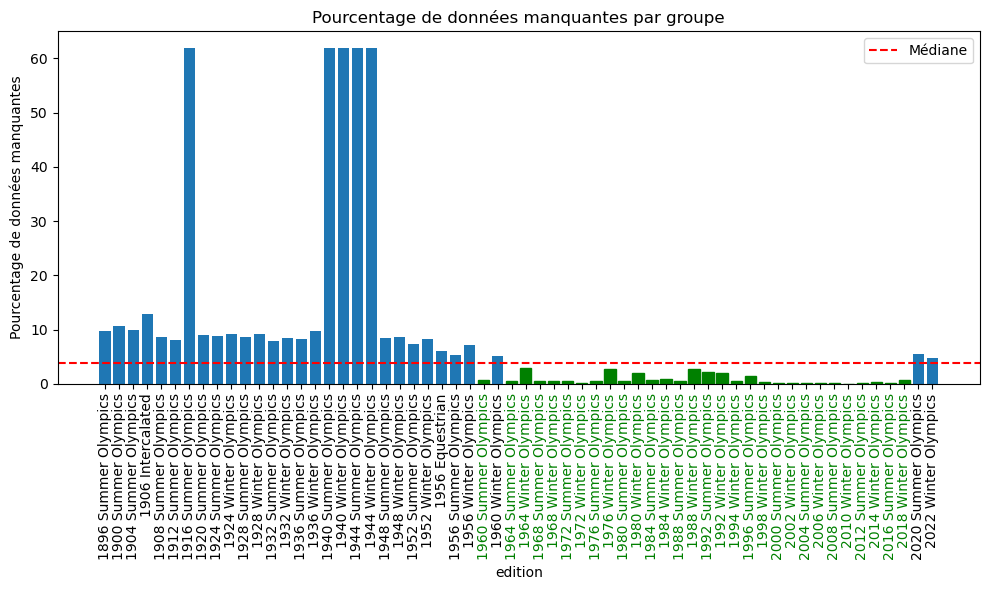

In [26]:
plt.figure(figsize=(10, 6))

# Calculer le pourcentage total de données manquantes par groupe
missing_percentage_total = df_phase_1.groupby('edition').apply(lambda x: x.isna().sum().sum() / x.size) * 100

# Calculer la médiane globale
median_percentage = missing_percentage_total.median()

# Créer le graphique à barres
bars = plt.bar(missing_percentage_total.index, missing_percentage_total.values)

plt.xlabel('edition')
plt.ylabel('Pourcentage de données manquantes')
plt.title('Pourcentage de données manquantes par groupe')

# Mettre les étiquettes à la verticale
plt.xticks(rotation='vertical')

# Ajouter une ligne pour la médiane globale
plt.axhline(median_percentage, color='r', linestyle='--', label='Médiane')
plt.legend()

# Colorer les barres en dessous de la médiane en vert
for i, bar in enumerate(bars):
    percentage = missing_percentage_total.values[i]
    if percentage < median_percentage:
        bar.set_color('g')

# Colorer les noms des groupes en dessous de la médiane en vert
for i, tick in enumerate(plt.gca().xaxis.get_major_ticks()):
    percentage = missing_percentage_total.values[i]
    if percentage < median_percentage:
        tick.label1.set_color('g')

# Sauvegarder le graphique (à positionner AVANT plt.show())
plt.tight_layout() # garantie que tous les éléments seront correctement ajustés dans la figure
#plt.savefig("Pourcentage_de_données_manquante_par_olympiades.svg") # Vectoriel
plt.savefig("Pourcentage_de_données_manquante_par_olympiades.png") # Le + utilisé
# Afficher le graphique
plt.show()



>>>*Il y a 5 années pour lesquelles aucun résultats n'est disponible (celles remontant un manque de données de 70%). <br>
>>>Ne remonte que l'olympiade et les données associées (date, lieu, ... cf ci-dessous)*

In [27]:
df_phase_1.loc[(df_phase_1['ed_id']==56),:]

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,height,weight,athl_country,athl_noc
256124,1944 Winter Olympics,56,1944,Winter,Cortina d'Ampezzo,ITA,Italy,—,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>>>*Pour la suite du projet nous décidons de ne garder que les données de 1960 à 2022.*

In [28]:
df_phase_2 = df_phase_1.loc[(df_phase_1['ed_year'] >= 1960) & (df_phase_1['ed_year'] <= 2022),:]

>>>* Analyse visuelle des valeurs manquantes par colonnes

In [29]:
# Trier le DataFrame par ordre alphabétique de 'edition_x'
df_sorted = df_phase_2.sort_values('edition')

# Compter le nombre de données manquantes par colonne et edition_x
missing_counts = df_sorted.groupby('edition').apply(lambda x: x.isna().sum())

# Réorganiser les données pour le graphique à barres empilées
stacked_data = missing_counts.stack().reset_index().rename(columns={0: 'Missing Count', 'level_1': 'Colonne'})

# Définir l'ordre des colonnes pour l'empilement
column_order = df.columns[1:]  # Exclure la colonne 'edition_x' du graphique

# Créer le graphique à barres empilées interactif avec Plotly
fig = px.bar(stacked_data, x='edition', y='Missing Count', color='Colonne', barmode='stack', category_orders={'edition': df_sorted['edition'].unique()}, color_discrete_sequence=px.colors.qualitative.Set1)

# Ajouter une légende
fig.update_layout(legend=dict(title='Colonnes'))

# Définir les étiquettes d'axe et le titre
fig.update_layout(xaxis=dict(title='edition'), yaxis=dict(title='Nombre de données manquantes'), title='Données manquantes par colonne et edition')

# Ajuster la taille de la figure
fig.update_layout(height=900, width=1200)

# Afficher le graphique interactif
fig.show()

>>>*Nous remarquons que les colonnes les plus impactées sont 'born', 'height' et 'weight'*

>>>*Voyons si les données des athlètes ('born', 'height', 'weight') ne se trouvent pas ailleurs dans le DataFrame.*

In [30]:
"""
# Les méthodes ffill et bfill permettent de remplacer les valeurs manquantes dans un DataFrame (ffill: en avant et bfill: en arrière)
df_temp = df_final
df_temp['born'] = df_temp.groupby('athlete')['born'].transform(lambda x: x.ffill().bfill())
df_temp['height'] = df_temp.groupby('athlete')['height'].transform(lambda x: x.ffill().bfill())
df_temp['weight'] = df_temp.groupby('athlete')['weight'].transform(lambda x: x.ffill().bfill())
"""

# Version améliorée
columns_to_fill = ['born', 'height', 'weight']
df_phase_2[columns_to_fill] = df_phase_2.groupby('athlete')[columns_to_fill].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

C:\Users\capit\AppData\Local\Temp\ipykernel_1556\2067906252.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



>>>*Effectuons plusieures passes afin de récupérer le maximum de données*

In [31]:
# 1° passe:
# Remplissage des NaN dans les colonnes 'height' et 'weight' par la médiane groupée par 'sport', 'event'et 'sex'
df_phase_2['height'] = df_phase_2.groupby(['sport', 'event', 'sex'])['height'].transform(lambda x: x.fillna(x.median()))
df_phase_2['weight'] = df_phase_2.groupby(['sport', 'event', 'sex'])['weight'].transform(lambda x: x.fillna(x.median()))

# 2° passe:
# Remplissage des NaN dans les colonnes 'height' et 'weight' par la médiane groupée par 'sport' et 'sex'
df_phase_2['height'] = df_phase_2.groupby(['sport', 'sex'])['height'].transform(lambda x: x.fillna(x.median()))
df_phase_2['weight'] = df_phase_2.groupby(['sport', 'sex'])['weight'].transform(lambda x: x.fillna(x.median()))

# 3+ passe:
# Remplissage des NaN dans les colonnes 'height' et 'weight' par la médiane groupée par 'sport'
df_phase_2['height'] = df_phase_2.groupby(['sport'])['height'].transform(lambda x: x.fillna(x.median()))
df_phase_2['weight'] = df_phase_2.groupby(['sport'])['weight'].transform(lambda x: x.fillna(x.median()))

C:\Users\capit\AppData\Local\Temp\ipykernel_1556\2873453015.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\capit\AppData\Local\Temp\ipykernel_1556\2873453015.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\capit\AppData\Local\Temp\ipykernel_1556\2873453015.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

>>>### Conclusions Phase 2

In [32]:
# Vérification du nombre de données manquantes
df_phase_2.isna().sum()

edition               0
ed_id                 0
ed_year               0
ed_type               0
ed_city               0
ed_noc                0
ed_country            0
competition_date      0
sport                 0
event                 0
result_id             0
athlete               0
athl_id               0
pos                   0
isTeamSport           0
sex                   0
born                784
height              143
weight              143
athl_country          0
athl_noc              0
dtype: int64

In [33]:
# Comptez les valeurs manquantes dans les colonnes 'born', 'height' et 'weight' des deux DataFrames
missing_in_df1 = df_phase_1[['born', 'height', 'weight']].isna().sum()
missing_in_df2 = df_phase_2[['born', 'height', 'weight']].isna().sum()

# Calculez la différence
difference_by_column = missing_in_df1 - missing_in_df2

# Générez et imprimez la phrase pour chaque colonne
for column, difference in difference_by_column.items():
    print(f"Il y a {abs(difference)} valeurs manquantes de moins dans la colonne '{column}' du deuxième DataFrame par rapport au premier.")


Il y a 4976 valeurs manquantes de moins dans la colonne 'born' du deuxième DataFrame par rapport au premier.
Il y a 86728 valeurs manquantes de moins dans la colonne 'height' du deuxième DataFrame par rapport au premier.
Il y a 86728 valeurs manquantes de moins dans la colonne 'weight' du deuxième DataFrame par rapport au premier.


>>>*Nous avons récupérer quelques lignes...*

In [34]:
# Affichage du nombre de lignes et de colonnes après le nettoyage
num_rows,num_columns = df_phase_2.shape
print("le nombre de lignes, après nettoyage, est de : ",num_rows)
print("le nombre de colonnes, après nettoyage, est de : ",num_columns)

le nombre de lignes, après nettoyage, est de :  242281
le nombre de colonnes, après nettoyage, est de :  21


In [35]:
# Calcul du nombre de valeurs manquantes ('NaN')
df_phase_2.isna().sum()


edition               0
ed_id                 0
ed_year               0
ed_type               0
ed_city               0
ed_noc                0
ed_country            0
competition_date      0
sport                 0
event                 0
result_id             0
athlete               0
athl_id               0
pos                   0
isTeamSport           0
sex                   0
born                784
height              143
weight              143
athl_country          0
athl_noc              0
dtype: int64

In [36]:
# Calcul du pourcentage de valeurs manquantes ( soit 'NaN' soit 'na')
nan_percentage = df_phase_2.isna().sum().sum() / (df_phase_2.shape[0] * df_phase_2.shape[1]) * 100
na_percentage = (df_phase_2 == 'na').sum().sum() / (df_phase_2.shape[0] * df_phase_2.shape[1]) * 100

total_percentage = nan_percentage + na_percentage

# Génération de la phrase avec arrondi à 2 chiffres
phrase = "Il y a {:.2f} % de données manquantes sur le DataFrame.".format(total_percentage)

print(phrase)

Il y a 0.02 % de données manquantes sur le DataFrame.


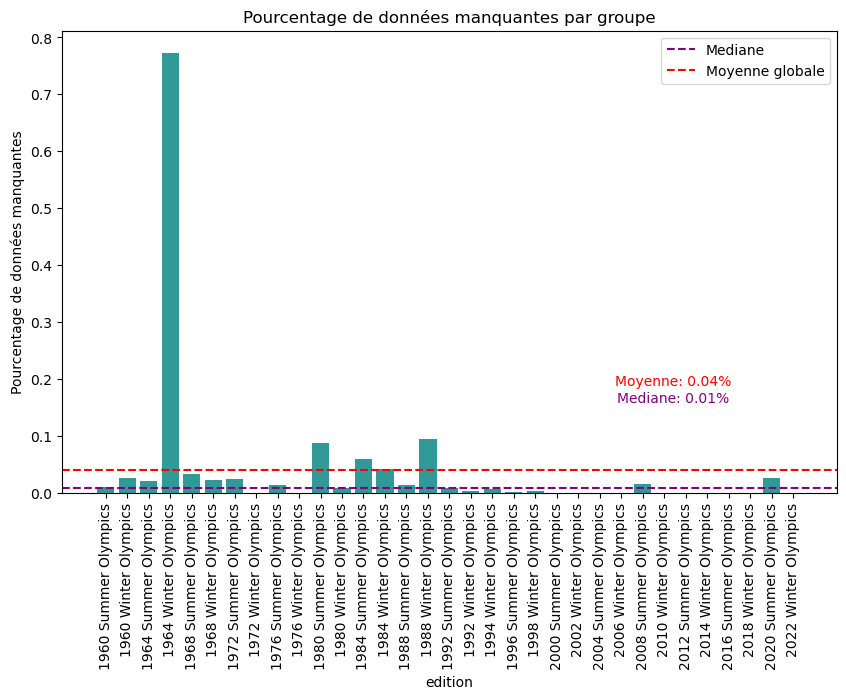

In [37]:
# Calculer le pourcentage total de données manquantes par groupe
missing_percentage_total = df_phase_2.groupby('edition').apply(lambda x: x.isna().sum().sum()/ x.size)*100

# Calculer la médiane globale
median_percentage = missing_percentage_total.median()

# Calculer la moyenne globale
mean_percentage = missing_percentage_total.mean()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage_total.index, missing_percentage_total.values)
plt.xlabel('edition')
plt.ylabel('Pourcentage de données manquantes')
plt.title('Pourcentage de données manquantes par groupe')

# Mettre les étiquettes à la verticale
plt.xticks(rotation='vertical')

# Ajouter une ligne pour la moyenne globale
plt.axhline(median_percentage, color='purple', linestyle='--', label='Mediane')
plt.axhline(mean_percentage, color='r', linestyle='--', label='Moyenne globale')
plt.legend()

plt.text(len(missing_percentage_total)/1.25, median_percentage+0.15, f"Mediane: {median_percentage:.2f}%", ha='center', color='purple')
plt.text(len(missing_percentage_total)/1.25, mean_percentage+0.15, f"Moyenne: {mean_percentage:.2f}%", ha='center', color='red')


plt.bar(missing_percentage_total.index, missing_percentage_total.values,color= '#329999')

# Afficher le graphique
plt.show()

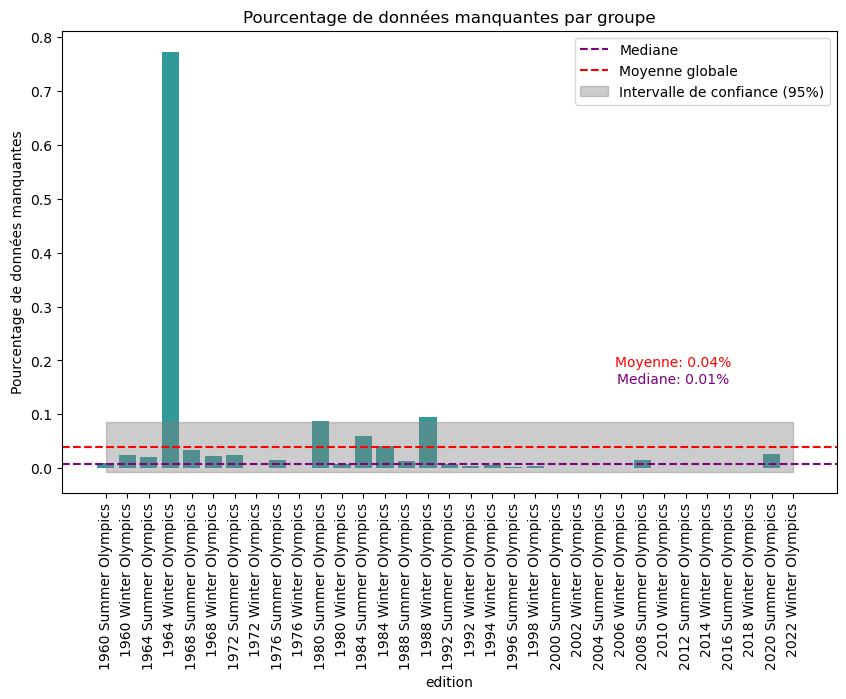

In [38]:
# Calculer l'intervalle de confiance
confidence_interval = 1.96 * missing_percentage_total.std() / np.sqrt(len(missing_percentage_total))

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage_total.index, missing_percentage_total.values, color='#329999')
plt.xlabel('edition')
plt.ylabel('Pourcentage de données manquantes')
plt.title('Pourcentage de données manquantes par groupe')

# Mettre les étiquettes à la verticale
plt.xticks(rotation='vertical')

# Ajouter une ligne pour la médiane
plt.axhline(median_percentage, color='purple', linestyle='--', label='Mediane')

# Ajouter une ligne pour la moyenne
plt.axhline(mean_percentage, color='r', linestyle='--', label='Moyenne globale')

plt.text(len(missing_percentage_total)/1.25, median_percentage+0.15, f"Mediane: {median_percentage:.2f}%", ha='center', color='purple')
plt.text(len(missing_percentage_total)/1.25, mean_percentage+0.15, f"Moyenne: {mean_percentage:.2f}%", ha='center', color='red')

# Ajouter la zone grise de l'intervalle de confiance
plt.fill_between(missing_percentage_total.index, mean_percentage - confidence_interval, mean_percentage + confidence_interval, color='gray', alpha=0.4, label='Intervalle de confiance (95%)')

# Afficher les légendes
plt.legend()

# Afficher le graphique
plt.show()


************************************

************************************

># MACHINE LEARNING

>>## Préparation des données pour le Machine learning

>>>### Tri du DataFrame

In [39]:
df_ML = df_phase_2.sort_values(['athl_id','event', 'ed_id'])

>>>### Création de nouvelles mesures

>>>>#### Age

In [40]:
# Transformation de la colonne 'born' afin d'extraire  l'année et en déduire l'âge

# Fonction personnalisée pour extraire le premier groupe de 4 chiffres trouvés dans la valeur
def extract_byear(value):
    match = re.search(r'\d{4}', str(value))
    if match:
        return match.group()
    return np.nan

# Insérer la nouvelle colonne 'bYear' en 16° position
df_ML.insert(17, 'b_year', '')
# Appliquer la fonction personnalisée à la colonne 'born' et stocker le résultat dans la colonne 'byear'
df_ML['b_year'] = df_ML['born'].apply(extract_byear)

# Transformer la colonne 'bYear' en type(float)
df_ML['b_year'] = df_ML['b_year'].astype(float)

# Insérer la nouvelle colonne 'Age' en 17° position
df_ML.insert(18, 'age', '')
df_ML['age'] = (df_ML['ed_year']-df_ML['b_year'])

>>>> *Il y a des données manquantes dans la colonne born, ce qui va poser des problèmes pour l'âge.<br>
>>>> Nous procédons donc à plusieures passes afin de retirer les valeurs manquantes.*

In [41]:
# 1° passe:
# Remplissage des NaN dans les colonnes 'height' et 'weight' par la médiane groupée par 'sport', 'event'et 'sex'
df_ML['age'] = df_ML.groupby(['sport', 'event', 'sex'])['age'].transform(lambda x: x.fillna(x.median()))

# 2° passe:
# Remplissage des NaN dans les colonnes 'height' et 'weight' par la médiane groupée par 'sport' et 'sex'
df_ML['age'] = df_ML.groupby(['sport', 'sex'])['age'].transform(lambda x: x.fillna(x.median()))

# 3+ passe:
# Remplissage des NaN dans les colonnes 'height' et 'weight' par la médiane groupée par 'sport'
df_ML['age'] = df_ML.groupby(['sport'])['age'].transform(lambda x: x.fillna(x.median()))

In [42]:
# Calcul du nombre de données manquantes
df_ML.isna().sum()

edition               0
ed_id                 0
ed_year               0
ed_type               0
ed_city               0
ed_noc                0
ed_country            0
competition_date      0
sport                 0
event                 0
result_id             0
athlete               0
athl_id               0
pos                   0
isTeamSport           0
sex                   0
born                784
b_year              803
age                   0
height              143
weight              143
athl_country          0
athl_noc              0
dtype: int64

In [43]:
# Visualisation du résultat
df_ML.head()

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,b_year,age,height,weight,athl_country,athl_noc
163410,1996 Summer Olympics,24,1996,Summer,Atlanta,USA,United States,20 July – 4 August,Tennis,"Doubles, Men",45511.0,Arnaud Boetsch,2.0,=17,True,Male,1969-04-01,1969.0,27.0,183.0,76.0,France,FRA
163408,1996 Summer Olympics,24,1996,Summer,Atlanta,USA,United States,20 July – 4 August,Tennis,"Singles, Men",45440.0,Arnaud Boetsch,2.0,=17,False,Male,1969-04-01,1969.0,27.0,183.0,76.0,France,FRA
149497,1992 Summer Olympics,23,1992,Summer,Barcelona,ESP,Spain,24 July – 9 August,Table Tennis,"Doubles, Men",47282.0,Nicolas Chatelain,6.0,=17,True,Male,1970-01-13,1970.0,22.0,181.0,70.0,France,FRA
149494,1992 Summer Olympics,23,1992,Summer,Barcelona,ESP,Spain,24 July – 9 August,Table Tennis,"Singles, Men",47135.0,Nicolas Chatelain,6.0,=33,False,Male,1970-01-13,1970.0,22.0,181.0,70.0,France,FRA
149498,1992 Summer Olympics,23,1992,Summer,Barcelona,ESP,Spain,24 July – 9 August,Table Tennis,"Doubles, Men",47282.0,Patrick Chila,7.0,=17,True,Male,1969-11-27,1969.0,23.0,180.0,73.0,France,FRA


>>>>#### Final_rank

* Transformation de la colonne 'pos' en 'f_rank' et 'q_rank' pour différencier les rangs en finales des rangs en qualifications 

In [44]:

# Fonction pour extraire les données numériques de la colonne 'pos'
def extract_numeric_rank(value):
    if pd.isnull(value):
        return None
    if isinstance(value, int):
        return value
    if isinstance(value, str):
        # Vérifier si la valeur commence par '='
        if value.startswith('='):
            # Extraire les chiffres de la valeur (en ignorant les caractères non numériques)
            numeric_chars = ''.join(filter(str.isdigit, value))
            if numeric_chars:
                return int(numeric_chars)
        if value.isdigit():
            return int(value)
    return None

# Appliquer la fonction sur la colonne 'pos' pour créer la colonne 'f_rank'
df_ML['f_rank'] = df_ML['pos'].apply(extract_numeric_rank)

# Remplacer les 'f_rank' manquants par 999
df_ML['f_rank'] = df_ML['f_rank'].fillna(999)

"""
# Pas retenu dans notre façon de procéder. (A étudier pour plus tard)
# Créer la colonne 'other_rank' avec les autres données de la colonne 'pos'
df_final['q_rank'] = df_final['pos'].apply(lambda x: x if pd.isnull(extract_numeric_rank(x)) else None)
"""

# Insertion des colonnes à la position souhaitée
after_column = 'pos'
column_index = df_ML.columns.get_loc(after_column)

#df_final.insert(column_index +1, 'q_rank', df_final.pop('q_rank'))
df_ML.insert(column_index +1, 'f_rank', df_ML.pop('f_rank'))



>>>>#### Features supplémentaires

In [45]:
# Fonction pour ajouter la colonne 'nb_participation'
def calculate_nb_participation(df):
    df['nb_participation'] = df.groupby(['athl_id', 'event']).cumcount()
    return df

# Fonction pour ajouter la colonne 'rank_n1'
def calculate_rank_n1(df):
    df['rank_n1'] = df.groupby(['athl_id', 'event'])['f_rank'].shift().fillna(np.inf)
    df['rank_n1'] = df.groupby(['athl_id'])['rank_n1'].transform(lambda x: x.min() if np.isinf(x.min()) else x)
    return df

# Fonction pour ajouter la colonne 'best_rank'
def calculate_best_rank(df):
    df['best_rank'] = df.groupby(['athl_id', 'event'])['f_rank'].shift().fillna(np.inf)
    df['best_rank'] = df.groupby(['athl_id', 'event'])['best_rank'].apply(lambda x: x if np.isinf(x.min()) else x.expanding().min())
    df['best_rank'] = df['best_rank'].fillna(np.inf)
    return df


# Fonction pour ajouter la colonne 'medal_n'
def calculate_medal_n(df):
    df['medal_n'] = df['f_rank'] <= 3
    df['medal_n'] = df['medal_n'].astype(int)
    return df

# Fonction pour ajouter la colonne 'medal_n1'
def calculate_medal_n1(df):
    df['medal_n1'] = df.groupby(['athl_id', 'event'])['f_rank'].shift() <= 3
    df['medal_n1'] = df['medal_n1'].astype(int)
    return df

# Fonction pour ajouter la colonne 'total_medals'
def calculate_total_medals(df):
    df['total_medals'] = df[df['f_rank'].shift() <= 3].groupby(['athl_id', 'event'])['medal_n1'].cumsum()
    df['total_medals'] = df['total_medals'].fillna(0)
    return df

# Appliquer les calculs en utilisant transform
df_ML = calculate_nb_participation(df_ML)
df_ML = calculate_rank_n1(df_ML)
df_ML = calculate_best_rank(df_ML)
df_ML = calculate_medal_n(df_ML)
df_ML = calculate_medal_n1(df_ML)
df_ML = calculate_total_medals(df_ML)


# Réinitialiser l'index
df_ML.reset_index(drop=True, inplace=True)

C:\Users\capit\AppData\Local\Temp\ipykernel_1556\3372452836.py:15: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



>>>>#### Supression des données inutiles

In [46]:
# Suppression des sports d'équipe
df_final = df_ML[df_ML['isTeamSport'] == False]


In [47]:
# Suppression des colonnes indésirables
cols_to_drop = ['edition', 
                #'ed_id', 
                'ed_city', 
                'ed_noc', 
                'competition_date',
                #'result_id', 
                #'athlete', 
                #'athl_id', 
                'pos', 
                'isTeamSport',
                'born',
                'b_year', 
                'athl_noc']
                
df_final = df_final.drop(columns=cols_to_drop)

In [48]:

# Réinitialisation de l'index
df_final.reset_index(drop=True, inplace=True)

df_final = df_final.sort_values(['athl_id','event', 'ed_id'])


In [49]:
# Afficher le DataFrame mis à jour
df_final.head()

,ed_id,ed_year,ed_type,ed_country,sport,event,result_id,athlete,athl_id,f_rank,sex,age,height,weight,athl_country,nb_participation,rank_n1,best_rank,medal_n,medal_n1,total_medals
0,24,1996,Summer,United States,Tennis,"Singles, Men",45440.0,Arnaud Boetsch,2.0,17.0,Male,27.0,183.0,76.0,France,0,inf,inf,0,0,0.0
1,23,1992,Summer,Spain,Table Tennis,"Singles, Men",47135.0,Nicolas Chatelain,6.0,33.0,Male,22.0,181.0,70.0,France,0,inf,inf,0,0,0.0
2,24,1996,Summer,United States,Table Tennis,"Singles, Men",47562.0,Patrick Chila,7.0,9.0,Male,27.0,180.0,73.0,France,0,inf,inf,0,0,0.0
3,26,2004,Summer,Greece,Table Tennis,"Singles, Men",48369.0,Patrick Chila,7.0,17.0,Male,35.0,180.0,73.0,France,1,9.0,9.0,0,0,0.0
4,53,2008,Summer,People's Republic of China,Table Tennis,"Singles, Men",262349.0,Patrick Chila,7.0,49.0,Male,39.0,180.0,73.0,France,2,17.0,9.0,0,0,0.0


In [50]:
# Calcul du nombre de données manquantes
df_final.isna().sum()

ed_id                0
ed_year              0
ed_type              0
ed_country           0
sport                0
event                0
result_id            0
athlete              0
athl_id              0
f_rank               0
sex                  0
age                  0
height              79
weight              79
athl_country         0
nb_participation     0
rank_n1              0
best_rank            0
medal_n              0
medal_n1             0
total_medals         0
dtype: int64

>>>>Les 79 poids et tailles manquants sont dûs à :<br>
>>>>- 39 pour 'Ice Stock Sport' (ndlr: Sport de crosse sur glace) épreuve de 1964 qui n'a pas été reconduite<br>
>>>>- 40 pour 'Sport Climbing' (ndlr: Escalade), arrivée aux JO en 2020<br>

In [51]:
# Export du df_ML

#df_final.to_csv(r'C:\Users\capit\Desktop\Projet Jedha\df_final.csv',index=False)
df_final.to_csv('df_ML.csv',index=False)

=================================================================================================================================================================================================

Suppression des colonnes (manipulation dans 'Dataiku' !)
*   edition 
*   ed_id #
*   ed_city
*   ed_noc
*   competition_date
*   result_id #
*   athlete #
*   athl_id #
*   pos
*   IsTeamSport
*   born
*   b_year
*   athl_noc


Split des années 2020 et 2022 dans 'Dataiku' pour évaluation des modèles

=================================================================================================================================================================================================

=================================================================================================================================================================================================

### Tests

In [52]:
df_final.loc[(df_final['athl_id']==7),:]
#df_final.loc[df_final['athl_id'] == 7].sort_values(['event', 'ed_id'])

# 93280 = Ian Thorpe
# 93860 = Michael Phelps
# 112724 = Teddy Riner

,ed_id,ed_year,ed_type,ed_country,sport,event,result_id,athlete,athl_id,f_rank,sex,age,height,weight,athl_country,nb_participation,rank_n1,best_rank,medal_n,medal_n1,total_medals
2,24,1996,Summer,United States,Table Tennis,"Singles, Men",47562.0,Patrick Chila,7.0,9.0,Male,27.0,180.0,73.0,France,0,inf,inf,0,0,0.0
3,26,2004,Summer,Greece,Table Tennis,"Singles, Men",48369.0,Patrick Chila,7.0,17.0,Male,35.0,180.0,73.0,France,1,9.0,9.0,0,0,0.0
4,53,2008,Summer,People's Republic of China,Table Tennis,"Singles, Men",262349.0,Patrick Chila,7.0,49.0,Male,39.0,180.0,73.0,France,2,17.0,9.0,0,0,0.0
